# Mixture Manifold HMC

This is not working because Zappa's algorithm leaves the distribution ON THE MANIFOLD invariant, not the true target distribution. Hence we are not targeting the correct distribution.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, norm
from ManifoldHMCAlgorithms.mixture_manifoldhmc import MixtureManifoldHMC

In [28]:
# Target Distribution 
Sigma = np.array([[1.0, 0.6], [0.6, 2.0]])        # Covariance Matrix of Target Distribution
mu = np.zeros(2)                                  # Mean of target distribution
target = multivariate_normal(mean=mu, cov=Sigma)

# Settings for sampling
n = 1            # Number of HMC samples per iteration
m = 30             # Number of Zappa samples per iteration
T = 2            # Total integration time
epsilon = 0.05    # Step size
M = np.eye(2)     # Coviariance Matrix for momentum distribution
alpha = 0.1       # Probability of using HMC
N = 200000         # Total number of samples

# Data for contour plot
xmin, xmax, xstep = -3, 3, 0.05
ymin, ymax, ystep = -3, 3, 0.05
x_grid, y_grid = np.mgrid[xmin:xmax:xstep, ymin:ymax:ystep]
contour_values = target.pdf(np.dstack((x_grid, y_grid)))

# Sample and plot
x0 = target.rvs()
samples = MixtureManifoldHMC(x0, alpha=alpha, N=N, n=n, m=m, Sigma=Sigma, mu=mu, T=T, epsilon=epsilon, M=M)

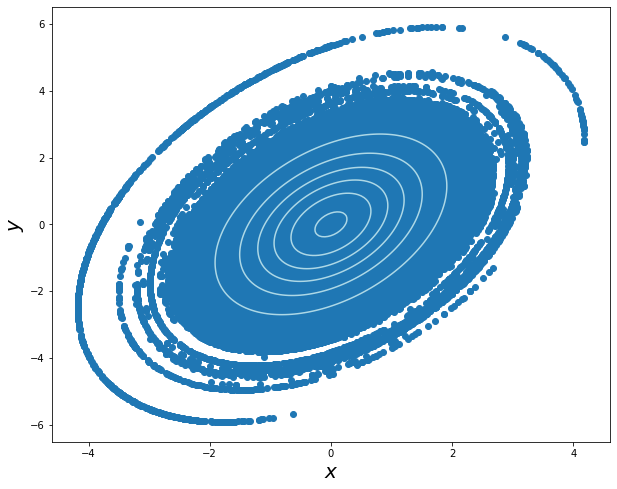

In [29]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(samples[:, 0], samples[:,1])
ax.contour(x_grid, y_grid, contour_values, colors="lightblue")
ax.set_xlabel(r"$x$", fontsize=20)
ax.set_ylabel(r"$y$", fontsize=20)
plt.show()

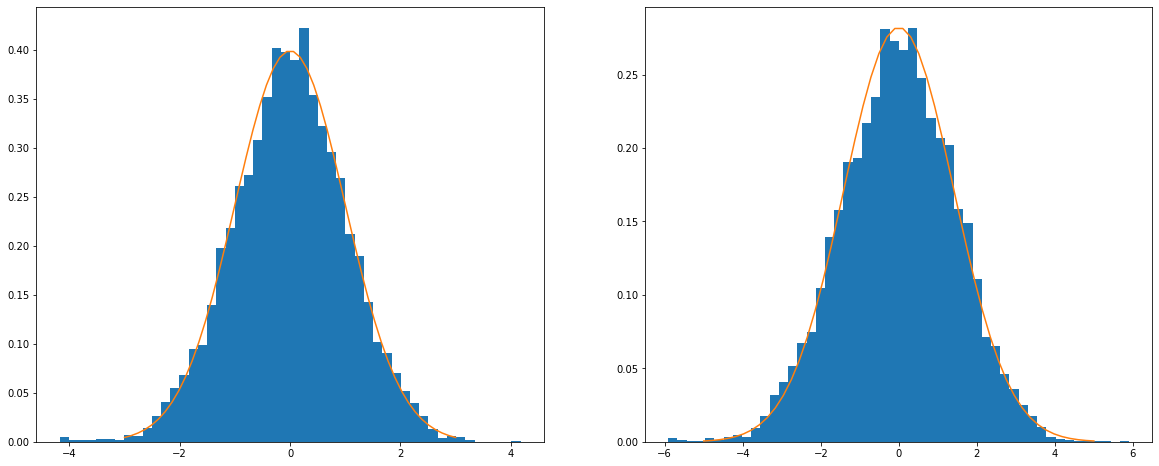

In [30]:
# marginals
marginal_x = norm(loc=mu[0], scale=np.sqrt(Sigma[0,0]))
marginal_y = norm(loc=mu[1], scale=np.sqrt(Sigma[1,1]))

# Plotting vars
xs = np.linspace(-3, 3)
ys = np.linspace(-5, 5)

fig, ax = plt.subplots(ncols=2, figsize=(20, 8))

# X space
_ = ax[0].hist(samples[:, 0], bins=50, density=True)
ax[0].plot(xs, marginal_x.pdf(xs))

# Y space
_ = ax[1].hist(samples[:, 1], bins=50, density=True)
ax[1].plot(ys, marginal_y.pdf(ys))

plt.show()